# Write a script that implement the GD algorithm, with the following structure:
Input:
    f: the function f(x) we want to optimize.
    It is supposed to be a Python function, not an array.
    grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.
    x0: an n-dimensional array which represents the initial iterate.
    kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)
    tolf: small float. The relative tollerance of the algorithm.
    Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
    tolx: small float. The tollerance in the input domain.
    Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
    Pay attention to the first iterate.
    Output:
    x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).
    k: an integer. The number of iteration needed to converge. k < kmax.
    f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.
    grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.
    err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.

In [227]:
import matplotlib.pyplot as plt
import numpy
import numpy as np

In [228]:
def plot(x, errf, x_true=False, back=False, alpha=0.2):
    k = len(x)
    title = f"{'x*= ' + str(x_true)  if x_true else ''} x_c={np.round(x[-1], 2)} N. of iteration: {k}, backtracking: {'yes' if back else 'no'} {'alpha: ' + str(alpha) if not back else ''}"
    plt.title(title)
    plt.plot(errf)
    legend=["error"]
    if x_true:
        x_errors = np.zeros(x.shape)
        for i, x_k in enumerate(x):
            x_errors[i] = np.linalg.norm(x_k - x_true)
        plt.plot(x_errors)
        legend.append("X error")
    #plt.subplot(2, 2, 2)
    #plt.plot(points, grads)
    #plt.subplot(2, 2, 3)
    #plt.plot(points, err)

    plt.legend(legend)
    plt.show()





def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha



def GD(f, grad_f, x0, tolf, tolx, kmax, alpha=0.2, back=False):

    x0 = np.array(x0)
    shape = (kmax, *x0.shape)
    # output
    x = np.zeros(shape)
    f_val = np.zeros(shape)
    grads = np.zeros(shape)
    err = np.zeros(shape)

    x_tol = tolx
    f_tol = tolf
    x_old = x0
    k = 0

    while k < kmax and x_tol >= tolx and f_tol >= tolf:
        if back:
            alpha = backtracking(f, grad_f, x_old)
        x_k = x_old - alpha * np.array(grad_f(x_old))
        x_tol = np.linalg.norm(x_k-x_old)
        f_tol = np.linalg.norm(f(x_k))

        # Update arrays
        x[k] = x_k
        f_val[k] = f(x_k)
        grads[k] = grad_f(x_k)
        err[k] = np.linalg.norm(grads[k])
        x_old = x_k
        k = k+1

    return x[:k], f_val[:k], grads[:k], err[:k]



## Test the algorithm above on the following functions:

In [229]:
tolf = 1e-4
tolx = 1e-4
kmax = 100
alphas = [0.1, 0.01]

### Function 1
 $$f(x_1, x_2) = (x_1-3)^2 + (x_2-1)^2$$
for which the true optimum is $x^* = (3,1)^T$

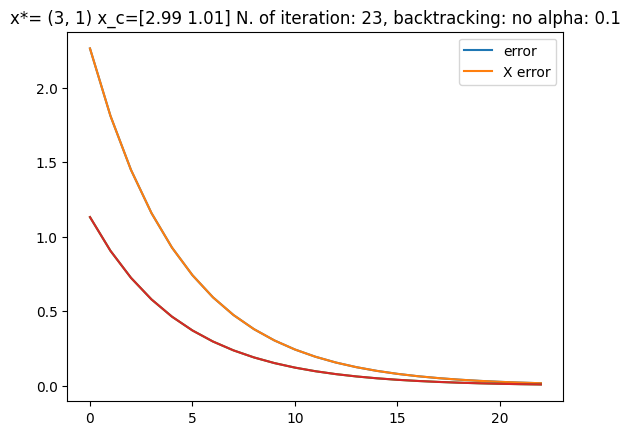

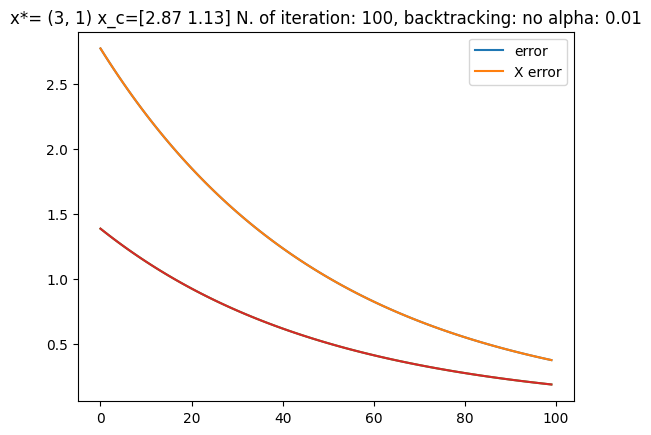

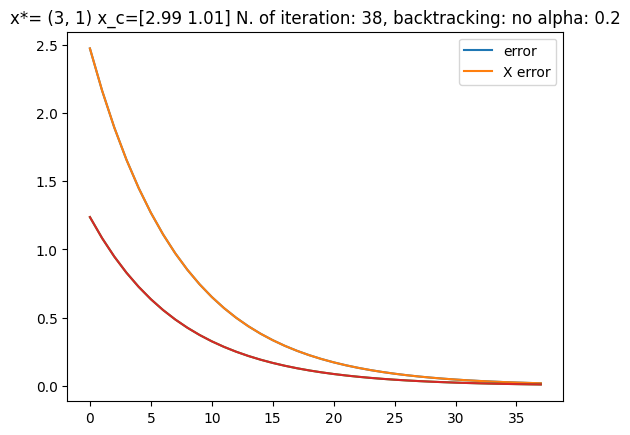

In [230]:
def f1(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2
def grad_f1(x):
    x1, x2 = x
    return np.array((2*(x1-3), 2*(x2-1)))


x0 = (2, 2)
x_true1 = (3,1)

def test_function(f, grad_f, x0, kmax, x_true=False, f5=False):
    for alpha in alphas:
        x, f_val, grads, err = GD(f, grad_f, x0, tolf, tolx, kmax, alpha)
        plot(x, err, x_true, alpha=alpha)
        if f5:
            x_ = np.linspace(-3, 3, 1000)
            plt.plot(x_, f(x_))
            plt.plot(x, f_val, "bo")
            plt.show()
    x, f_val, grads, err = GD(f, grad_f, x0, tolf, tolx, kmax, back=True)
    plot(x, err, x_true)

    if f5:
        x_ = np.linspace(-3, 3, 1000)
        plt.plot(x_, f(x_))
        plt.plot(x, f_val, "bo")
        plt.show()

test_function(f1, grad_f1, x0, kmax, x_true1)

## Function 2
$$f(x_1, x_2) = 10 (x_1-1)^2 + (x_2 - 2)^2$$

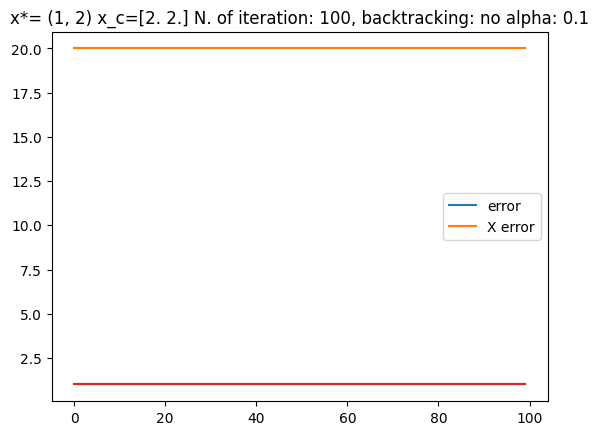

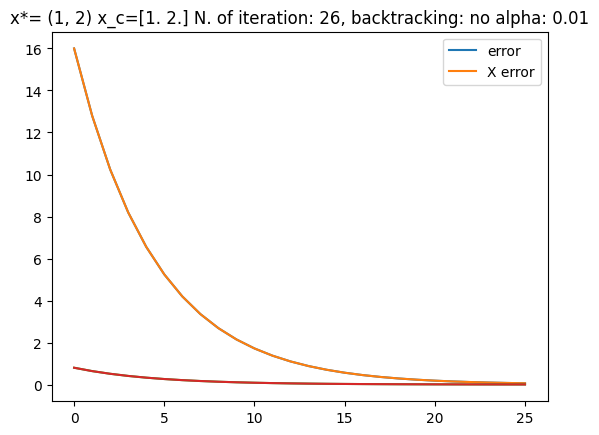

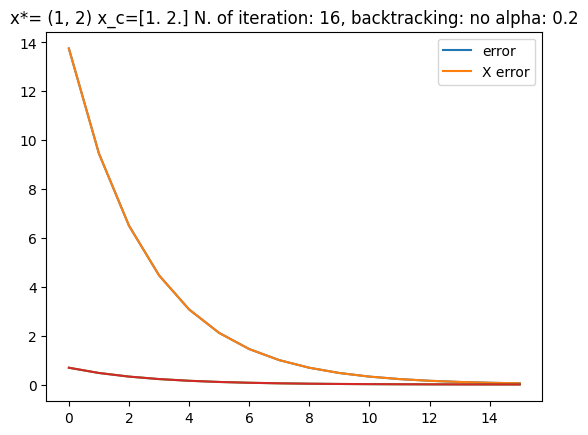

In [231]:
def f2(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2
def grad_f2(x):
    x1, x2 = x
    return np.array((20*(x1-1), 2*(x2-2)))


x0 = (2, 2)
x_true2 = (1,2)

test_function(f2, grad_f2, x0, kmax, x_true2)

## Function 3
$$f(x) = \frac{1}{2}||Ax-b||^2_2 $$

N =  5


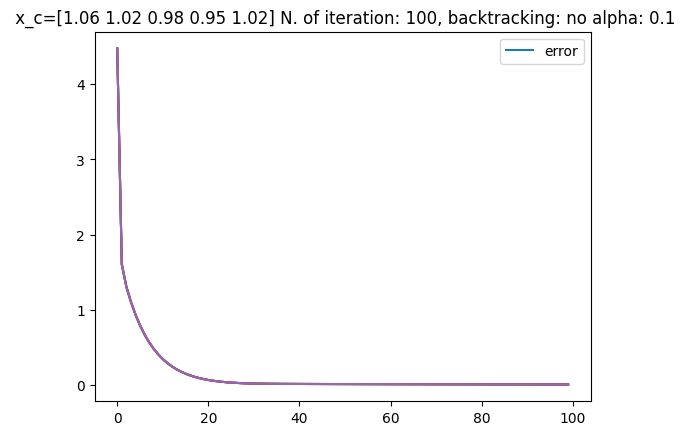

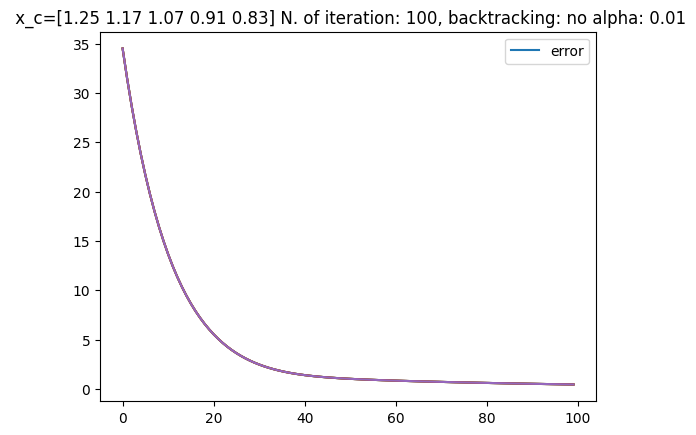

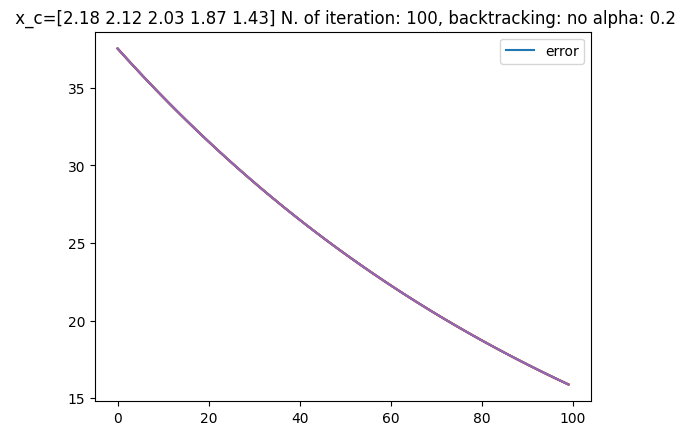

N =  10


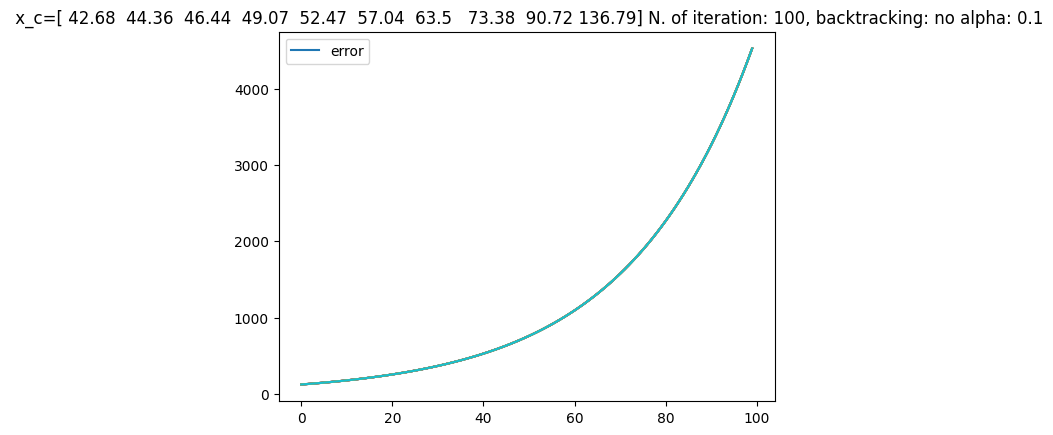

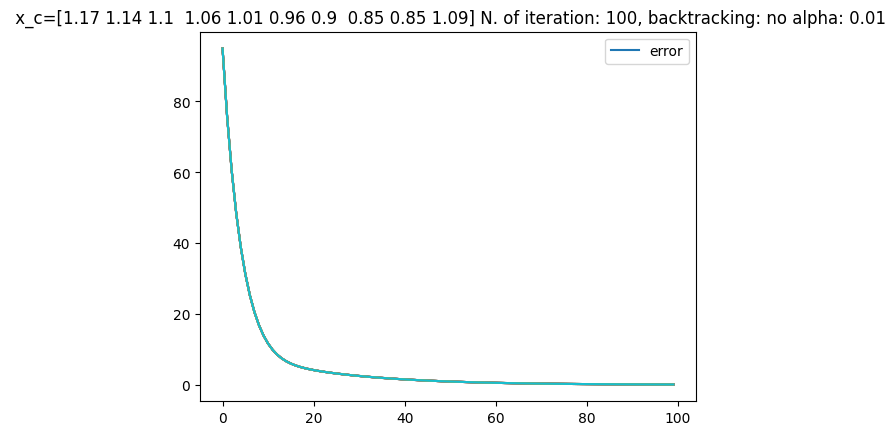

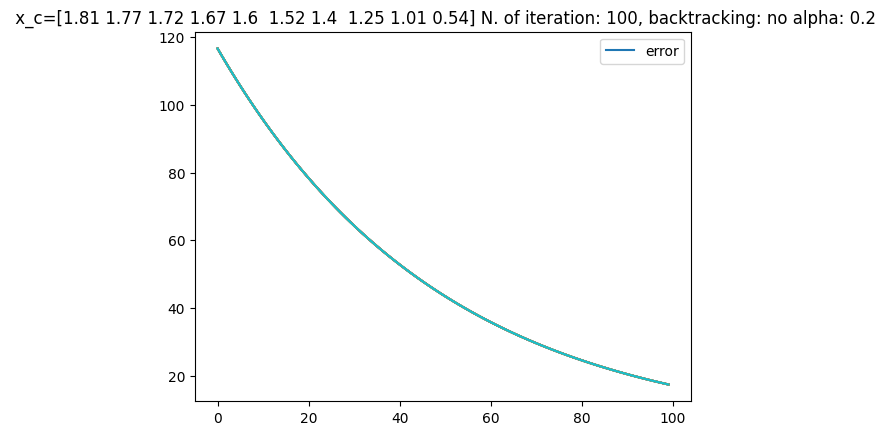

N =  15


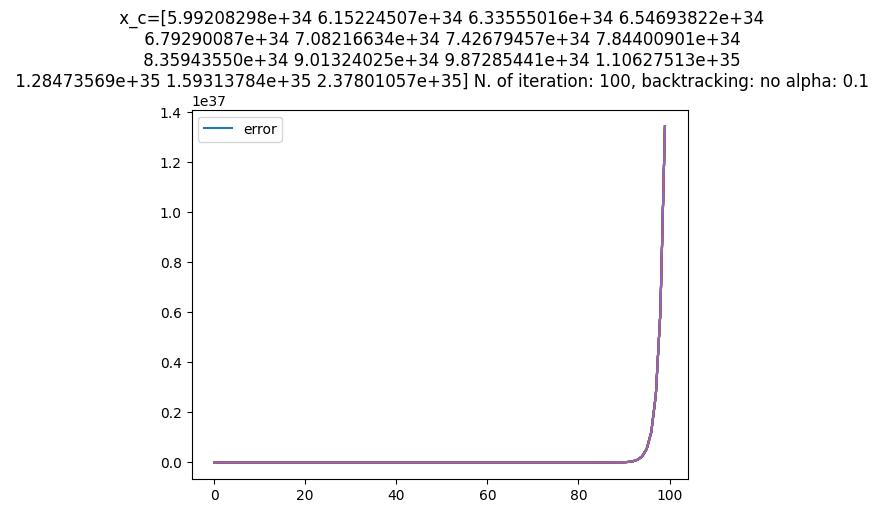

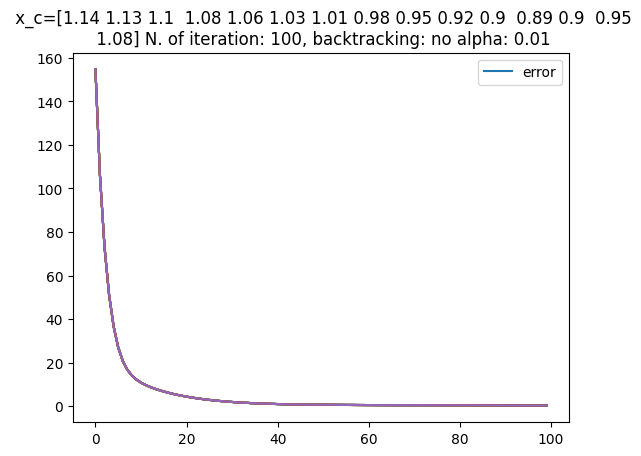

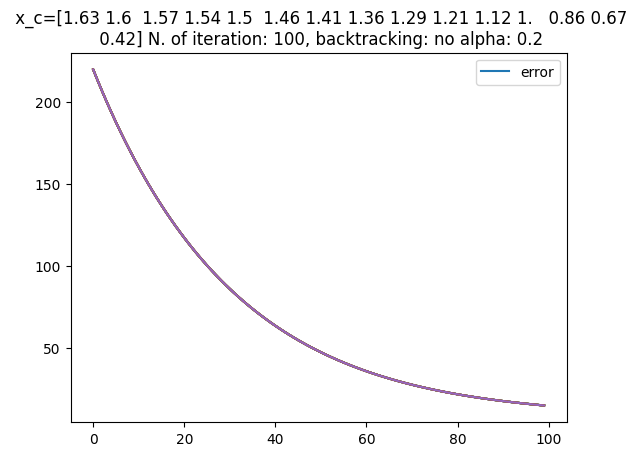

In [232]:
def f3(x):
    x = np.array(x)
    x = np.reshape(x,(1, len(x)))
    n, m = x.shape
    x_true = np.ones((1, n))
    v = np.linspace(0, 1, n, endpoint=True)
    A = numpy.vander(v)
    b = A @ x_true
    return 1/2 * np.linalg.norm(A @ x - b, 2)**2

def grad_f3(x):
    n = len(x)
    v = np.linspace(0,1,n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b = A @ x_true
    return np.array(A.T@(A@x-b))


N = [5, 10, 15]

for n in N:
    x0 = [3 for i in range(n)]
    print("N = ", n)
    test_function(f3, grad_f3, x0, kmax)

## Function 4
$$f(x) = \frac{1}{2}||Ax-b||^2_2 + \frac{\lambda}{2}||x||^2_2 $$

Lambda:  0.0


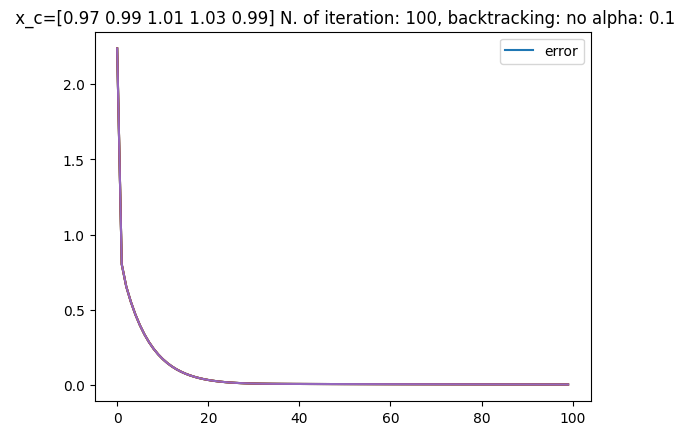

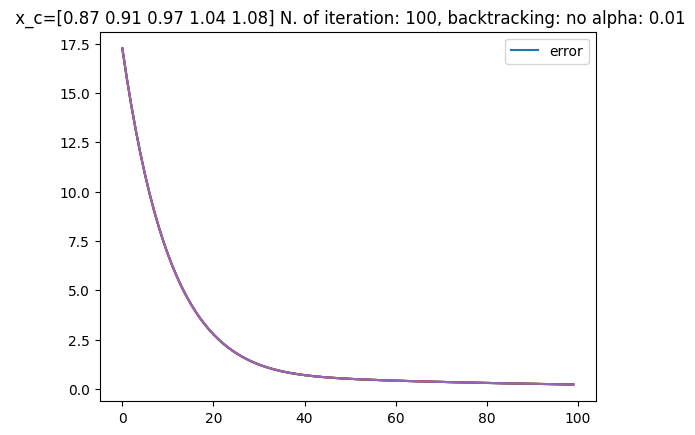

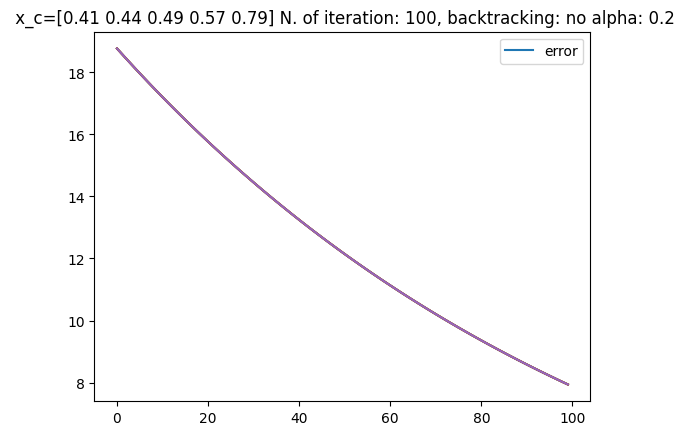

Lambda:  0.5


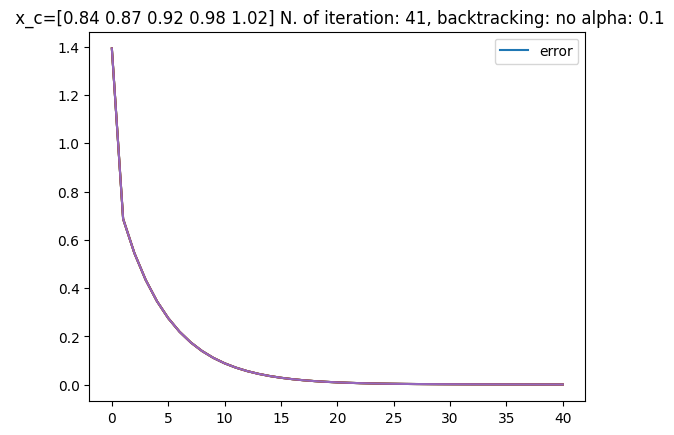

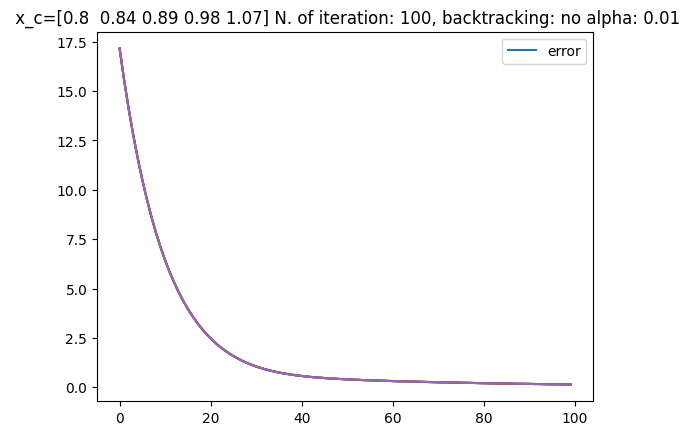

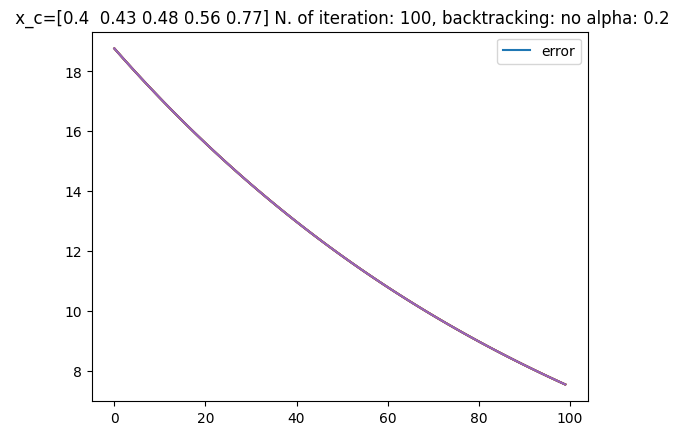

Lambda:  1.0


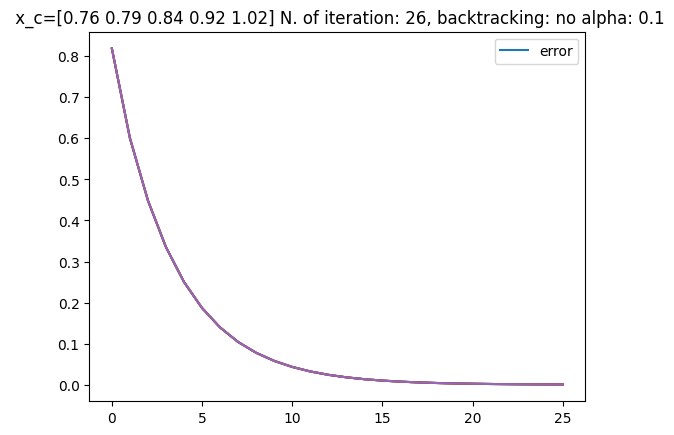

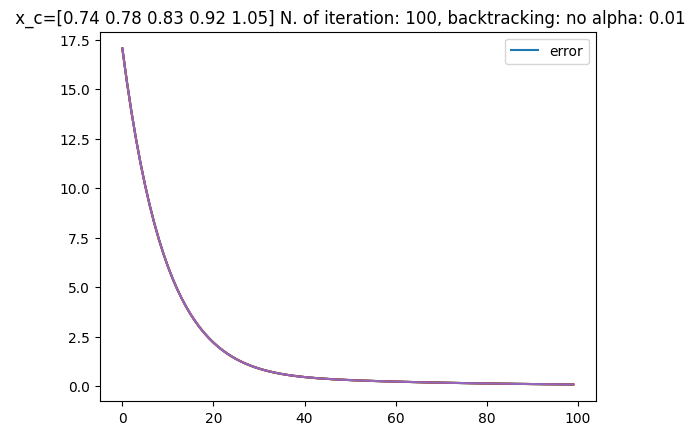

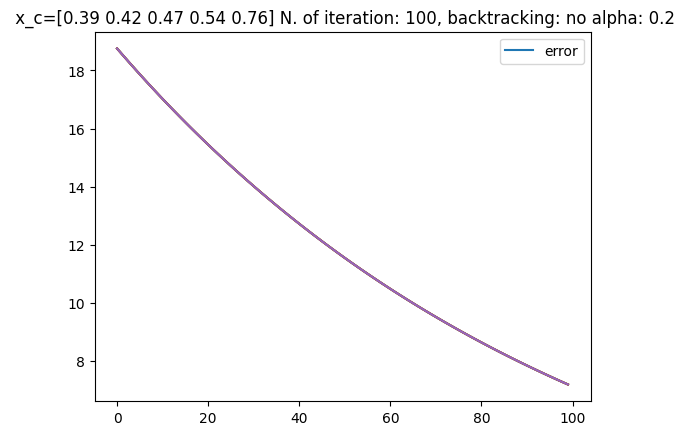

In [233]:
def f4_builder(lmb):
    def f4(x):
        x = np.array(x)
        x = np.reshape(x, (1, len(x)))
        n, m = x.shape
        x_true = np.ones((1, n))
        v = np.linspace(0, 1, n, endpoint=True)
        A = numpy.vander(v)
        b = A @ x_true
        return 1/2 * np.linalg.norm(A @ x - b, 2)**2 + lmb/2 * np.linalg.norm(x)**2
    return f4

def grad_f4_builder(lmb):
    def grad_f4(x):
        n = len(x)
        v = np.linspace(0,1,n)
        A = np.vander(v)
        x_true = np.ones(n).T
        b = A @ x_true
        return np.array(A.T@(A@x-b)) + lmb*x
    return grad_f4


n = 5
lmbs = np.linspace(0, 1, 3)
x0 = [0 for i in range(n)]


for lmb in lmbs:
    print("Lambda: ", lmb)
    f4 = f4_builder(lmb)
    grad_f4 = grad_f4_builder(lmb)
    test_function(f4, grad_f4, x0, kmax)

### Function 5
$$ f(x)= x^4 + x^3 -2x^2 - 2x $$

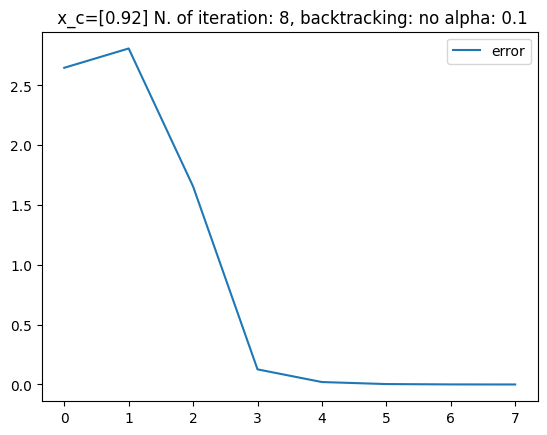

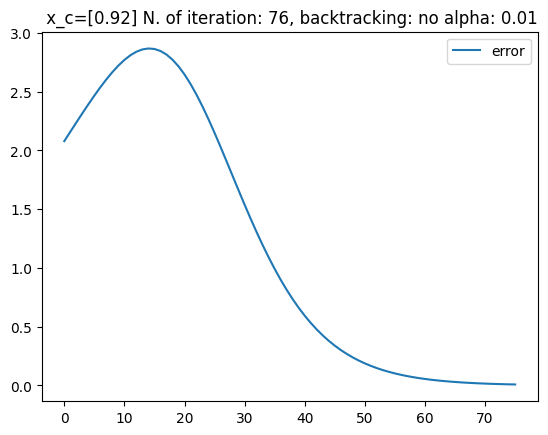

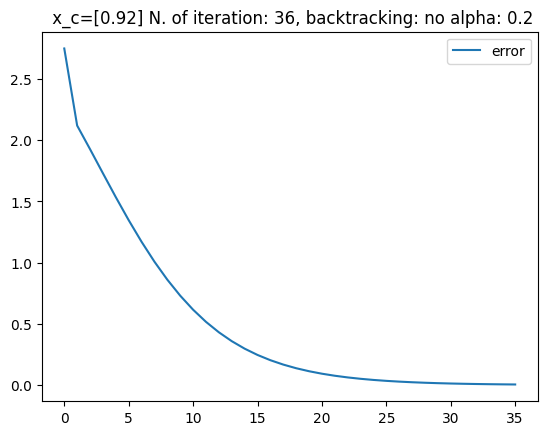

In [234]:
def f5(x):
    return np.power(x,4) + np.power(x, 3) - 2*np.power(x,2) - 2*x

def grad_f5(x):
    return np.array(4*np.power(x, 3) + 3*np.power(x,2) - 4*x - 2)


N = np.arange(5, 20, 5)

x0 = [0.]
test_function(f5, grad_f5, x0, kmax)

Only for the non-convex function defined in 5, plot it in the interval [−3, 3] and test the convergence point of GD with different values of x0 and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

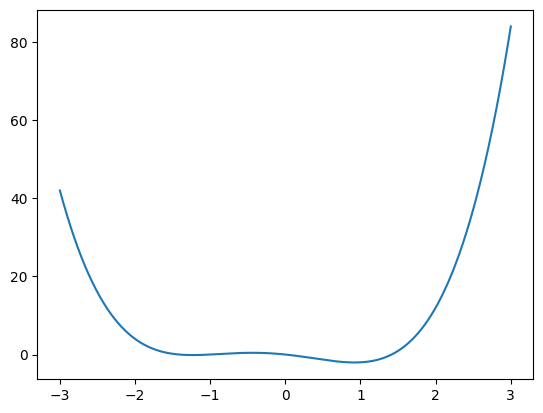

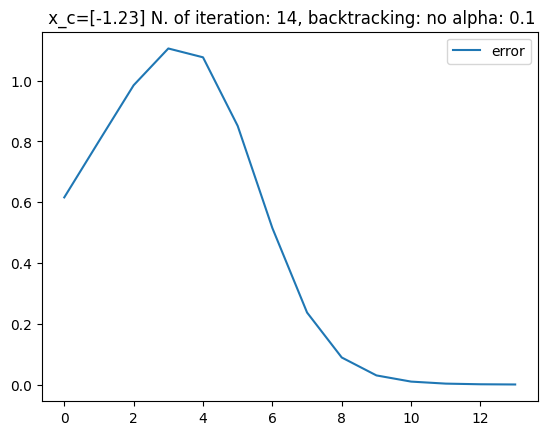

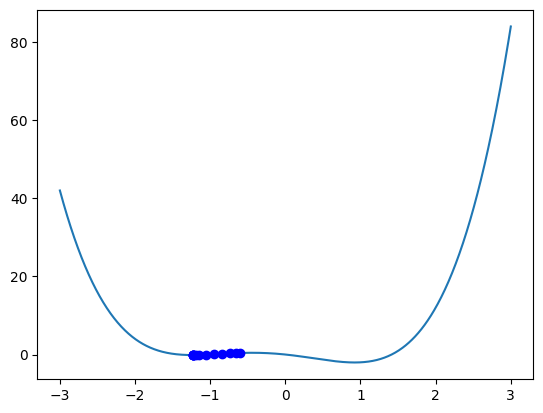

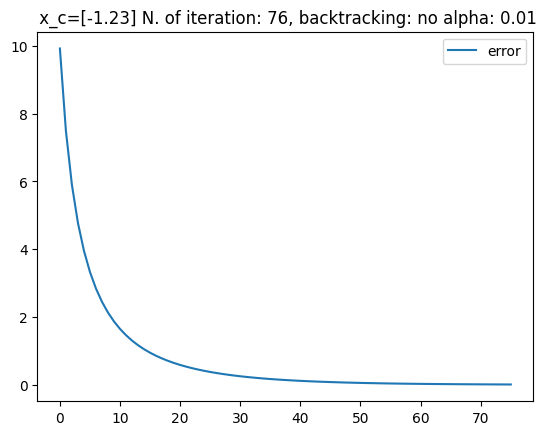

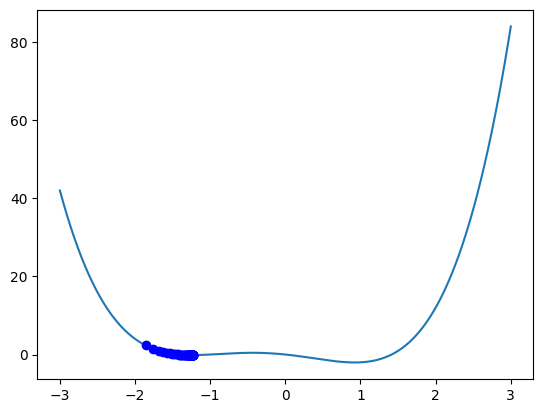

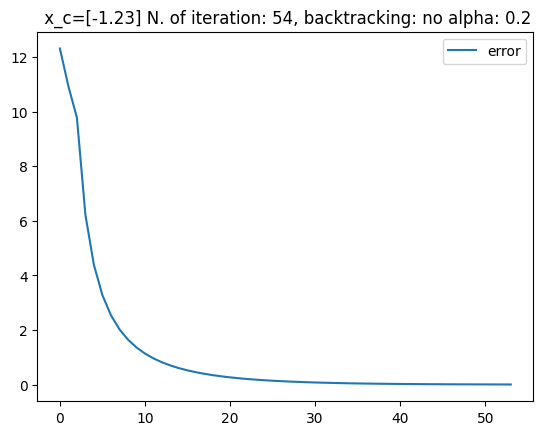

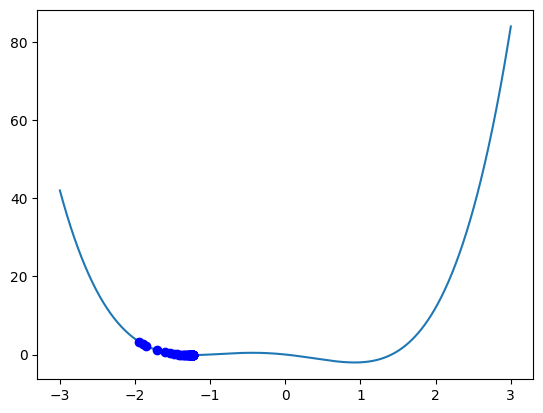

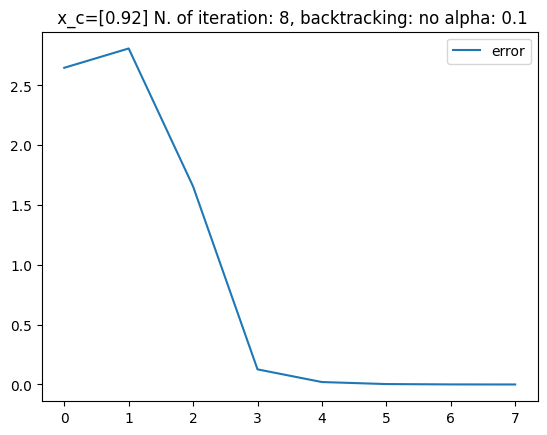

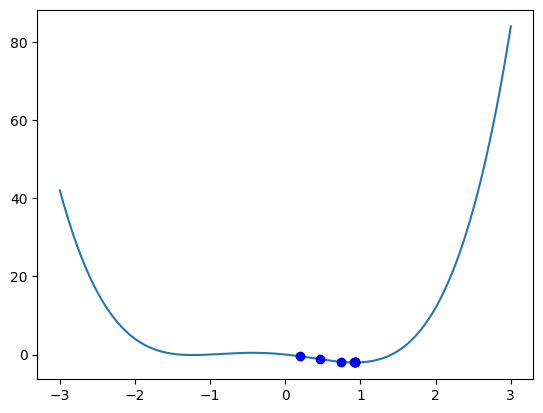

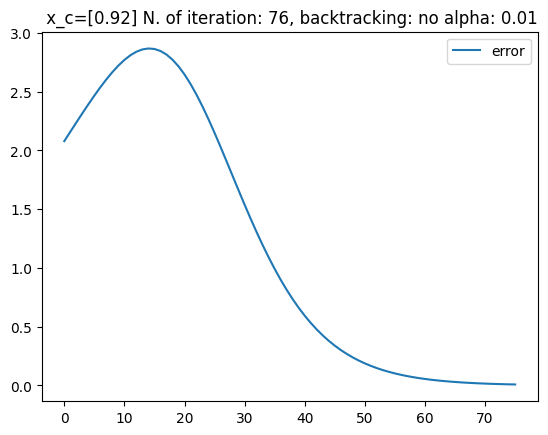

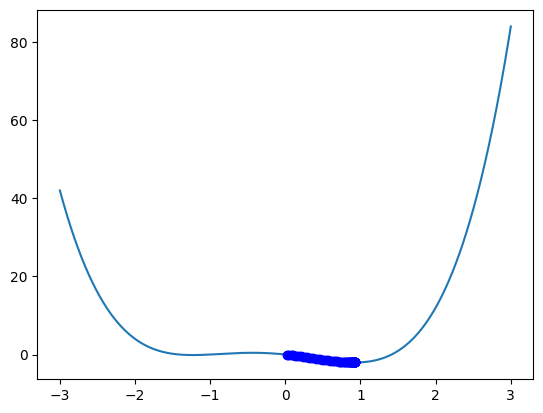

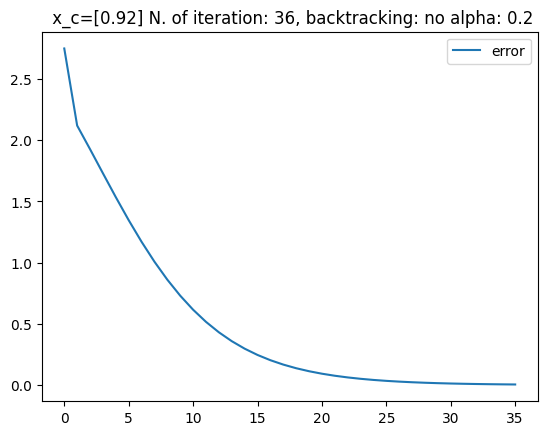

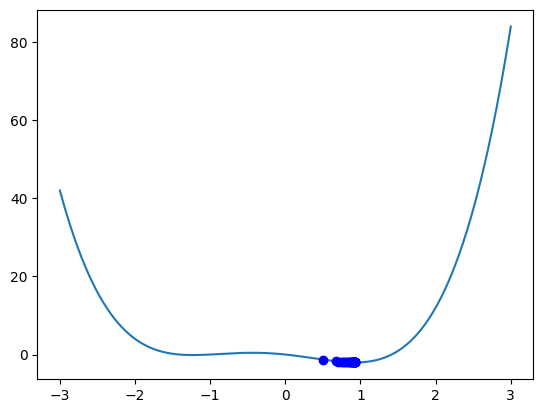

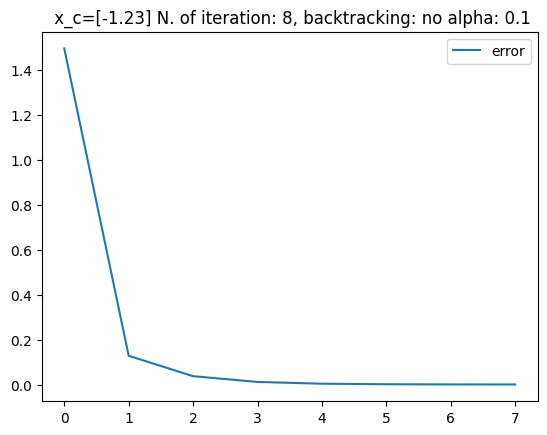

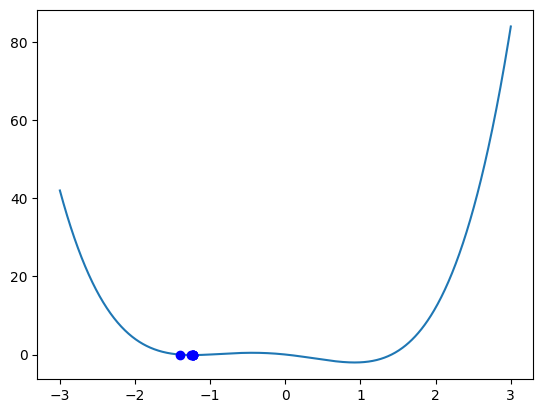

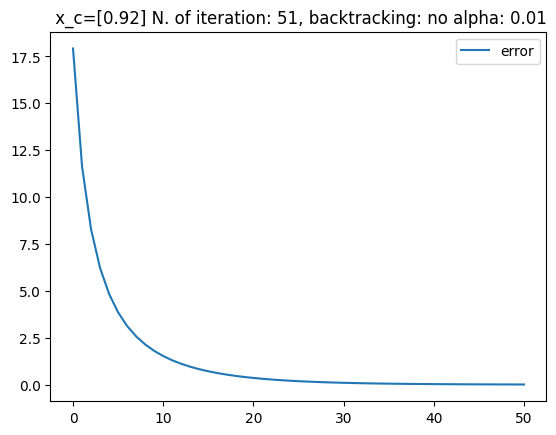

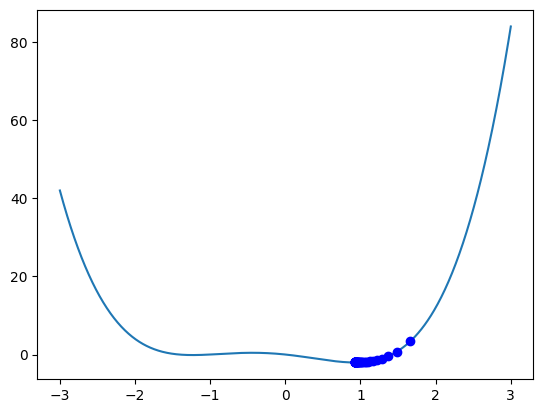

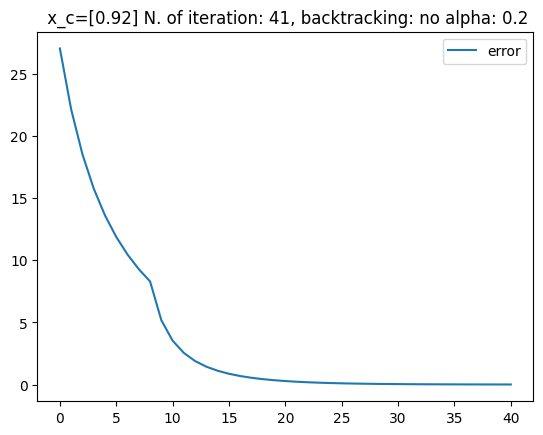

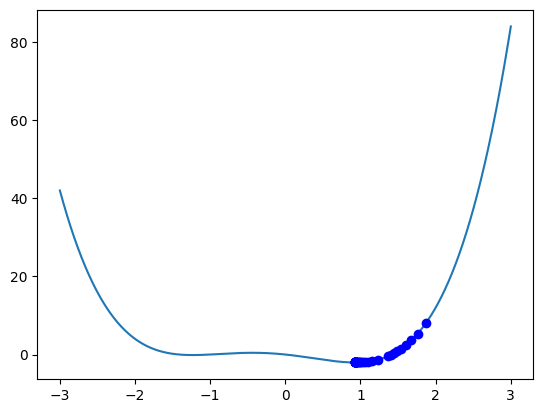

In [235]:
x_5 = np.linspace(-3, 3, 1000)
plt.plot(x_5, f5(x_5))
plt.show()

starting_points = [-2, 0, 2]

for x0 in starting_points:
    x0 = np.array([x0])
    test_function(f5, grad_f5, x0, kmax, f5=True)


Hard (optional): For the functions 1 and 2, plot the contour around the minimum and the path defined
by the iterations (following the example seen during the lesson). See plt.contour to do that.

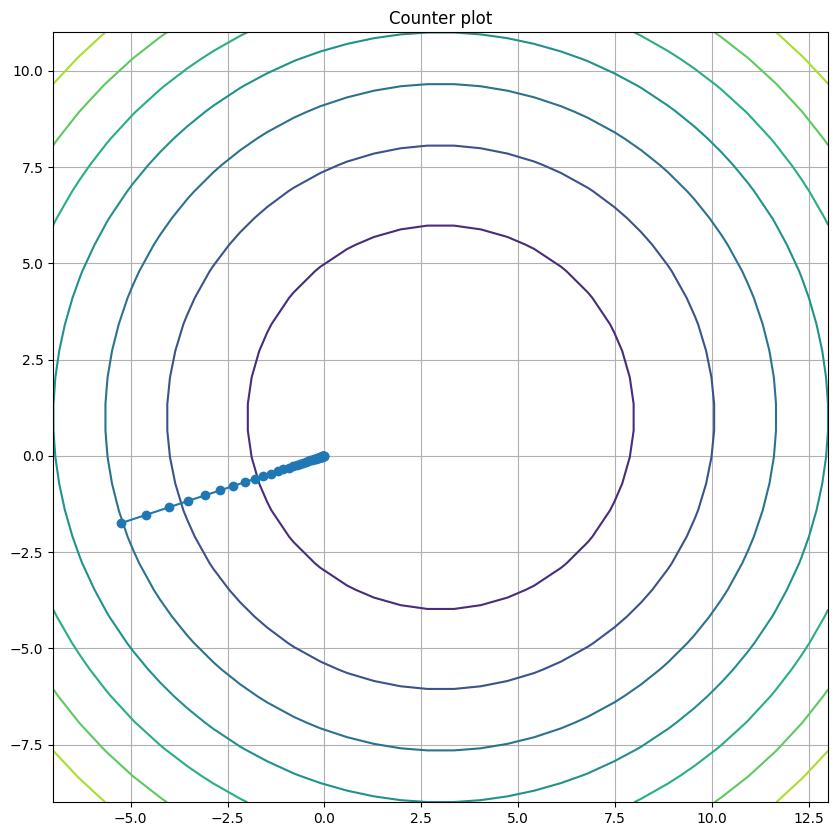

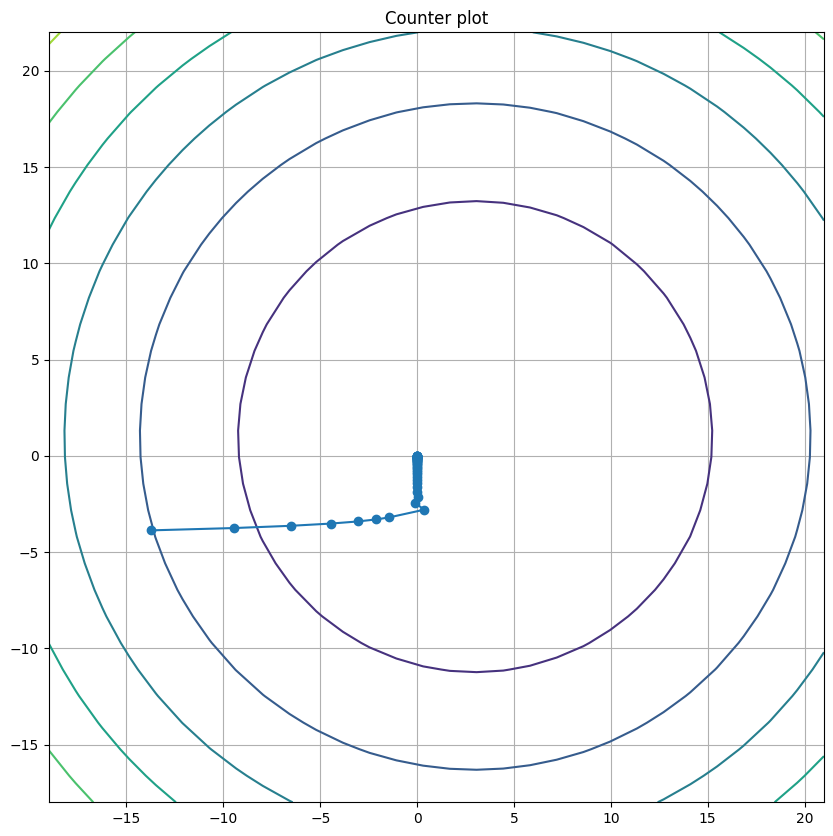

In [236]:
def contour(f, grad_f, x0, x_true, radius, tolx, tolf, kmax):
    x11, x12 = x_true

    xv = np.linspace(x11 - radius, x11 + radius, 30)
    yv = np.linspace(x12 - radius, x12 + radius, 30)
    xx, yy = np.meshgrid(xv, yv)

    x, f_val, grads, err = GD(f, grad_f, x0, tolf, tolx, kmax, back=True)
    zz = f1((xx, yy))

    plt.figure(figsize=(10,10))
    plt.contour(xx, yy, zz)
    plt.plot(grads[:, 0], grads[:, 1], 'o-')
    plt.title("Counter plot")
    plt.grid()
    plt.show()


contour(f1, grad_f1, (0, 0), x_true1, 10, tolx, tolf, kmax)
contour(f2, grad_f2, (0, 0), x_true2, 20, tolx, tolf, kmax)

# Optimization via Stochastic Gradient DescentInput:
l: the function l(w; D) we want to optimize.
It is supposed to be a Python function, not an array.
grad_l: the gradient of l(w; D). It is supposed to be a Python function, not an array.
w0: an n-dimensional array which represents the initial iterate. By default, it
should be randomly sampled.
data: a tuple (x, y) that contains the two arrays x and y, where x is the input data,
y is the output data.
batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
n_epochs: an integer. The number of epochs you want to reapeat the iterations.
Output:
w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
f_val: an array that contains the value of l(w_k; D)
FOR EACH iterate w_k ONLY after each epoch.
grads: an array that contains the value of grad_l(w_k; D)
FOR EACH iterate w_k ONLY after each epoch.
err: an array the contains the value of ||grad_l(w_k; D)||_2
FOR EACH iterate w_k ONLY after each epoch.

In [237]:

import pandas as pd

data = pd.read_csv("./data.csv")
data = np.array(data)


In [238]:
# Utils

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))


def f(w, xhat):
    return sigmoid(xhat.T @ w)


def grad_f(w, xhat):
    return (sigmoid(xhat.T @ w) * (1 - sigmoid(xhat.T @ w)) * xhat.T)


def MSE(f_w_x, y):
    return np.linalg.norm((f_w_x-y))**2


def grad_MSE(grad_f_w_x, f_w_x, y):
    return grad_f_w_x.T * (f_w_x - y)


def ell(w, X, Y):
    d, N = X.shape

    mse_sum = 0
    for i in range(0, N):
        mse_sum += MSE(f(w, X[:, i]), Y[i])

    return mse_sum / N


def grad_ell(w, X, Y):
    d, N = X.shape

    grad_mse_sum = 0
    for i in range(0, N):
        grad_mse_sum += grad_MSE(np.array(grad_f(w,
                                 X[:, i])), f(w, X[:, i]), Y[i])

    return grad_mse_sum / N


In [239]:
def batch(x, y, batch_size):
    n = x.shape[1]
    idx = np.arange(n)
    np.random.shuffle(idx)
    n_batches = n // batch_size
    for i in range(n_batches):
        batch_index = idx[i*(batch_size):(i+1)*batch_size]
        yield x[:, batch_index], y[batch_index]


def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    alpha = 1e-3


    X, Y = D
    X_backup = X
    Y_backup = Y
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)

    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)
        batch_iterator = batch(Xhat, Y, batch_size)

        for Mx, My in batch_iterator:
            M = (Mx, My)
            w = w0 - alpha * grad_l(w0, Mx, My)
            w_vals.append(w)

            w0 = w

        X = X_backup
        Y = Y_backup
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))
    
    return w, f_vals, grad_f_vals, err_vals

def x_split(X, Y, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest

def get_digits(X, Y, chosen_numbers):
    I = [idx for idx, elem in enumerate(Y) if elem in chosen_numbers]
    X_def = X[:, I]
    Y_def = Y[I]
    
    return X_def, Y_def



In [240]:
X = data[:, 1:].T
Y = data[:, 0]

chosen_digits = [1, 6]
X = data[:, 1:].T
Y = data[:, 0]


X_set, Y_set = get_digits(X, Y, chosen_digits)

d, N = X_set.shape
N_train = int(N/3*2)
Y_set[Y_set == chosen_digits[0]] = 0
Y_set[Y_set == chosen_digits[1]] = 1

X_train, X_test, Y_train, Y_test = x_split(X_set, Y_set, N_train)

D = (X_train, Y_train)


In [241]:


d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
w, f_vals, grad_vals, err_vals = SGD(
    ell, grad_ell, w0, D, batch_size, n_epochs)


/tmp/ipykernel_14154/769535597.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


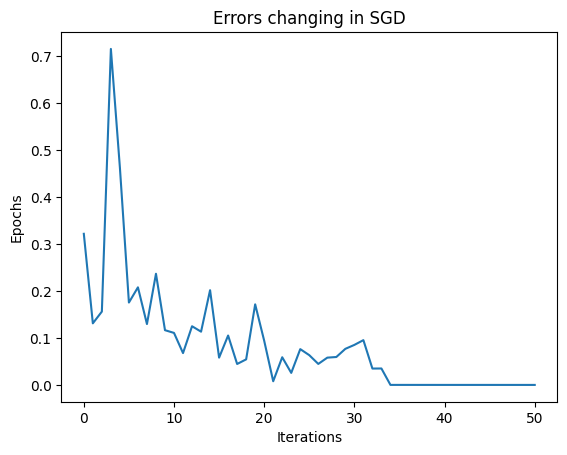

In [242]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors changing in SGD")
plt.xlabel("Iterations")
plt.ylabel("Epochs")
plt.show()

In [243]:

def accuracy(app, Y, chosen_indeces):
    tot = 0
    for i in range(len(Y)):
        if (int(app[i]) == Y[i]):
            tot += 1
    return tot, tot/len(Y)


def predict(w, X, threshold=0.5):
    d, N = X.shape
    predicted = np.zeros(N)
    for i in range(N):
        result = f(w, X[:, i])
        if (result >= threshold):
            predicted[i] = 1
        else:
            predicted[i] = 0
    return predicted


In [244]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = accuracy(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("accuracyuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = accuracy(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))


Matches on Train Set: 5841
Total entries on Train Set: 5880
accuracyuracy on Train Set: 99.34
Matches on Test Set: 2907
Total entries on Test Set: 2941
Accuracy on Test Set: 98.84


In [245]:
def GD_2(l, grad_l, w0, D, tolf=1e-9, tolx=1e-9, kmax=50, alpha=1e-1):
    X, Y = D
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1, N)), X), axis=0)

    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    iterations = 0

    while iterations < kmax:
        w = w_vals[-1] - alpha * grad_l(w_vals[-1], Xhat, Y)

        w_vals.append(w)
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))

        iterations += 1

        if err_vals[-1] < tolf * err_vals[0]:
            break

        if np.linalg.norm(w_vals[-1] - w_vals[-2]) < tolx * np.linalg.norm(w_vals[0]):
            break

    return (w, f_vals, grad_f_vals, err_vals, iterations)


In [246]:
w_gd, f_vals_gd, grad_vals_gd, err_vals_gd, iterations_gd = GD_2(
    ell, grad_ell, w0, D)


/tmp/ipykernel_14154/769535597.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


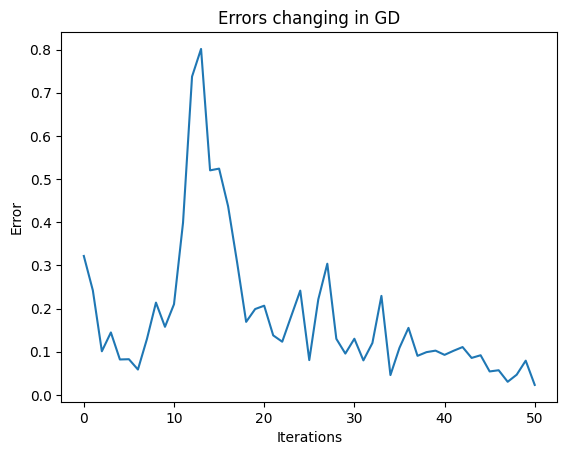

In [247]:
x_plot = np.arange(len(err_vals_gd))
plt.plot(x_plot, err_vals_gd)
plt.title("Errors changing in GD")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()


In [248]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1, N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = accuracy(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("accuracyuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1, N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = accuracy(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))


Matches on Train Set: 5778
Total entries on Train Set: 5880
accuracyuracy on Train Set: 98.27
Matches on Test Set: 2861
Total entries on Test Set: 2941
Accuracy on Test Set: 97.28
